# Problem 1

### Getting familiar with loading, visualizing and operating on multivariate data

A Hess diagram is a 2D plot coded by a third quantity.

Here's an example from the [astroML documentation](https://www.astroml.org/examples/datasets/plot_SDSS_SSPP.html) showing the temperature and surface gravity (how strongly the star would pull on you if you could stand on it's surface, including the effect of rotation), color coded on the left by density, and on the right by metallicity (measured here as the ratio of iron to hydrogen) with density contours.


<img src="https://www.astroml.org/_images/plot_SDSS_SSPP_1.png">

From http://das.sdss.org/va/stripe_82_variability/SDSS_82_public/, download eight HLC\*fits.gz files (and recall how you can use `astropy.io.fits` to load these)

The HLC files are each different bands on the sky.

For each HLC file, separate stars and galaxies by using the `MEAN_OBJECT_TYPE` column and making a cut with value > 5 to find stars.

For each HLC file, and separately for stars and galaxies make a 3-panel plot.

In the left plot show `r` vs `g-i` color coded by density (recall we did this with `seaborn`'s `jointplot`, but you can use whatever).

Estimate a bivariate distribution for `density(r, g-i)` this sample (recall we did with `seaborn`'s `jointplot` use `kde`, but you can use whatever).

In the middle and right panel, again plot `r` vs `g-i`, but now color-coded by proper motion in RA, and Dec. Overlay the density contors.

Comment on the structure in stars vs galaxies, and the evolution with position on the sky in each HLC.


In [502]:
# %pylab
# %matplotlib inline

# from astropy.table import Table

# import astropy.io.fits as afits

# hlcdata = afits.open('HLC.RA_00_to_01.fits')
# #hlcdata.info()

# data = hlcdata[1].data
# #Table(data)

# mean_object = data['MEAN_OBJECT_TYPE']
# star = data[mean_object > 5]
# galaxy = data[mean_object < 5]

# #Table(star)

# #ugriz
# r = star['MEAN_PSFMAG'][:,2]
# g_i = star['MEAN_PSFMAG'][:,1] - star['MEAN_PSFMAG'][:,3]
# starRA = star['RA_PM']
# starDEC = star["DEC_PM"]

# import seaborn as sns

# #sns.jointplot(x=r,y=g_i, kind='hex', color="skyblue")

# # set plot cut

# # r_index = (r > 10) & (r < 25) 
# # g_i_index = (g_i > -10) & (g_i < 10)

# # r_refined = r[(r_index) & (g_i_index) ] 
# # g_i_refined = g_i[(r_index) & (g_i_index) ]


# # sns.jointplot(x=r_refined,y=g_i_refined, kind='hex', color="skyblue")

# r_mean = np.mean(r)
# r_std = np.std(r)
# print( str(r_mean) + "\n" + str(r_std))

# g_i_mean = np.mean(g_i)
# g_i_std = np.std(g_i)
# print( str(g_i_mean) + "\n" + str(g_i_std))

# #set plot cut
# r_index = (r > r_mean-r_std*1.2) & (r < r_mean+r_std*1.2) 

# g_i_index = (g_i > g_i_mean-g_i_std*1.2 ) & (g_i < g_i_mean+g_i_std*1.2)
# r_refined = r[(r_index) & (g_i_index) ]
# g_i_refined = g_i[(r_index) & (g_i_index) ]
# #sns.jointplot(x=r_refined,y=g_i_refined, kind='hex', color="skyblue")
# starRA_refined = starRA[(r_index) & (g_i_index)]
# starDEC_refined = starDEC[(r_index) & (g_i_index)]

# sns.jointplot(x=r_refined,y=g_i_refined, kind='kde', color="skyblue")

# fig = plt.figure()
# ax = fig.add_subplot()
# ax.scatter(x=r_refined,y=g_i_refined,c=starRA_refined,marker='.',s=1,alpha=0.5,cmap='RdPu')

# sns.jointplot(x=r_refined, y=g_i_refined, kind='kde')

# #x = np.arange(8)
# #y = np.array([1,5,3,6,2,4,5,6])
# #df = pd.DataFrame({"x-axis": x,"y-axis": y})

# # import pandas as pd
# # df = pd.DataFrame({"r":r_refined,"g_i":g_i_refined,"starRA":starRA_refined,"starDEC":starDEC_refined})
# # df
# # ax = plt.figure()
# # ax1= ax.add_subplot()
# # ax1 = sns.scatterplot(x="r",y="g_i",hue="starRA",data=df)



# # Define custom colormaps: Set pixels with no sources to white
# cmap = plt.cm.jet
# cmap.set_bad('w', 1.)

# cmap_multicolor = plt.cm.jet
# cmap_multicolor.set_bad('w', 1.)

# from scipy import stats
# #generate density matrix as a function of r_refined and g_i_refined
# Star_density = stats.binned_statistic_2d(r_refined, g_i_refined,starRA_refined,'count', bins=100)
# #generate matrix of starRA_refined as a function of r_refined and g_i_refined 
# Star_RAmatrix = stats.binned_statistic_2d(r_refined, g_i_refined,starRA_refined,'mean', bins=100)
# Star_density.x_edge[-1]
# fig, (star_1, star_2, star_3) = plt.subplots(figsize=(13, 3), ncols=3)
# #imshow needs transpose of original matrix
# star_1.imshow(np.log10(Star_RAmatrix.statistic.T), origin = 'lower',extent=[Star_RAmatrix.x_edge[0]
# ,Star_RAmatrix.x_edge[-1],Star_RAmatrix.y_edge[0], Star_RAmatrix.y_edge[-1]],aspect = 'auto',
# cmap = cmap)
# #add colorbar
# #???what is mappable 
# #fig.colorbar(mappable,ax=star_1) 
# #add density contour
# star_1.contour(np.log10(Star_density.statistic.T),levels=10,color='k',line_width = 1,
# extent=[Star_density.x_edge[0]
# ,Star_density.x_edge[-1],Star_density.y_edge[0], Star_density.y_edge[-1]])



In [505]:
%pylab
%matplotlib inline
import astropy.io.fits as afits
import seaborn as sns
from scipy import stats

def plot_data(star,plot_name):
    r = star['MEAN_PSFMAG'][:,2]
    g_i = star['MEAN_PSFMAG'][:,1] - star['MEAN_PSFMAG'][:,3]
    starRA = star['RA_PM']
    starDEC = star["DEC_PM"]
    
    #set magnitude cut
    r_mean = np.mean(r)
    r_std = np.std(r)
    
    g_i_mean = np.mean(g_i)
    g_i_std = np.std(g_i)
    
    r_index = (r > r_mean-r_std*1.2) & (r < r_mean+r_std*1.2) 
    g_i_index = (g_i > g_i_mean-g_i_std*1.2 ) & (g_i < g_i_mean+g_i_std*1.2)
    
    r_refined = r[(r_index) & (g_i_index) ]
    g_i_refined = g_i[(r_index) & (g_i_index) ]
    starRA_refined = starRA[(r_index) & (g_i_index)]
    starDEC_refined = starDEC[(r_index) & (g_i_index)]
    
    # Define custom colormaps: Set pixels with no sources to white
    cmap = plt.cm.jet
    cmap.set_bad('w', 1.)

    cmap_multicolor = plt.cm.jet
    cmap_multicolor.set_bad('w', 1.)

    #generate density matrix as a function of r_refined and g_i_refined
    Star_density = stats.binned_statistic_2d(r_refined, g_i_refined,starRA_refined,'count', bins=100)
    #generate matrix of starRA_refined as a function of r_refined and g_i_refined 
    Star_RAmatrix = stats.binned_statistic_2d(r_refined, g_i_refined,starRA_refined,'mean', bins=100)
    Star_DECmatrix = stats.binned_statistic_2d(r_refined, g_i_refined,starDEC_refined,'mean', bins=100)
    fig, (star_1, star_2, star_3) = plt.subplots(figsize=(13, 3), ncols=3)
    #---------------------------------------------------------
    # plot 1 
    sns.kdeplot(data=r_refined, data2=g_i_refined, ax=star_1, cbar=True,cmap=cmap, shade=True)
#sns.jointplot(x=r_refined,y=g_i_refined, kind='kde', color="skyblue",ax=star_1)
#     ??? estimate kde distribution and plot the matrix
#     star_1.imshow(np.log10(Star_density.statistic.T), origin = 'lower',extent=[Star_density.x_edge[0]
#     ,Star_density.x_edge[-1],Star_density.y_edge[0], Star_density.y_edge[-1]],aspect = 'auto',
#     cmap = cmap)
    
    
    #---------------------------------------------------------
    #plot 2 
    
    #imshow needs transpose of original matrix
    star2 = star_2.imshow(np.log10(Star_RAmatrix.statistic.T), origin = 'lower',extent=[Star_RAmatrix.x_edge[0]
    ,Star_RAmatrix.x_edge[-1],Star_RAmatrix.y_edge[0], Star_RAmatrix.y_edge[-1]],aspect = 'auto',
    cmap = cmap)
    #add colorbar
    fig.colorbar(star2,ax=star_2)
    #???what is mappable 
    #fig.colorbar(mappable,ax=star_1) 
    #add density contour
    star_2.contour(np.log10(Star_density.statistic.T),levels=10,color='k',line_width = 1,
    extent=[Star_density.x_edge[0]
    ,Star_density.x_edge[-1],Star_density.y_edge[0], Star_density.y_edge[-1]])
    
    #----------------------------------------------------------
    #plot 3
    star3 = star_3.imshow(np.log10(Star_DECmatrix.statistic.T), origin = 'lower',extent=[Star_DECmatrix.x_edge[0]
    ,Star_DECmatrix.x_edge[-1],Star_DECmatrix.y_edge[0], Star_DECmatrix.y_edge[-1]],aspect = 'auto',
    cmap = cmap)
    fig.colorbar(star3,ax=star_3)
    #add colorbar
    #???what is mappable 
    #fig.colorbar(mappable,ax=star_1) 
    #add density contour
    star_3.contour(np.log10(Star_density.statistic.T),levels=10,color='k',line_width = 1,
    extent=[Star_density.x_edge[0]
    ,Star_density.x_edge[-1],Star_density.y_edge[0], Star_density.y_edge[-1]])
    
    

def plot_file(filename):
    hlcdata = afits.open(filename+".fits")
    data = hlcdata[1].data
    mean_object = data['MEAN_OBJECT_TYPE']
    
    star = data[mean_object > 5]
    galaxy = data[mean_object < 5]   
    
    plot_data(star,"star")
    plot_data(galaxy,"galaxy")
    
def main_plot():
    file_list=["HLC.RA_00_to_01",
    "HLC.RA_01_to_02","HLC.RA_02_to_03", "HLC.RA_03_to_04", \
    "HLC.RA_20_to_21","HLC.RA_21_to_22","HLC.RA_22_to_23", "HLC.RA_23_to_24"]
    for filename in file_list:
        plot_file(filename)

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


/Users/zhengkai/miniconda3/envs/fds/lib/python3.6/site-packages/ipykernel_launcher.py:55: RuntimeWarning: divide by zero encountered in log10
/Users/zhengkai/miniconda3/envs/fds/lib/python3.6/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in log10
/Users/zhengkai/miniconda3/envs/fds/lib/python3.6/site-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in log10
/Users/zhengkai/miniconda3/envs/fds/lib/python3.6/site-packages/ipykernel_launcher.py:65: UserWarning: The following kwargs were not used by contour: 'color', 'line_width'
/Users/zhengkai/miniconda3/envs/fds/lib/python3.6/site-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
/Users/zhengkai/miniconda3/envs/fds/lib/python3.6/site-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10
/Users/zhengkai/miniconda3/envs/fds/lib/python3.6/site-packages/ipykernel_launcher.py:77: RuntimeWarning: divide by zero

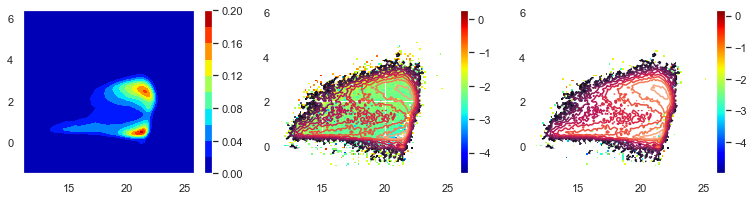

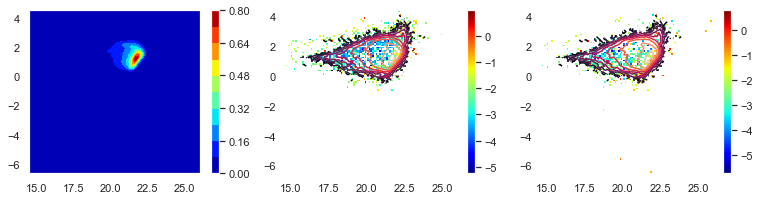

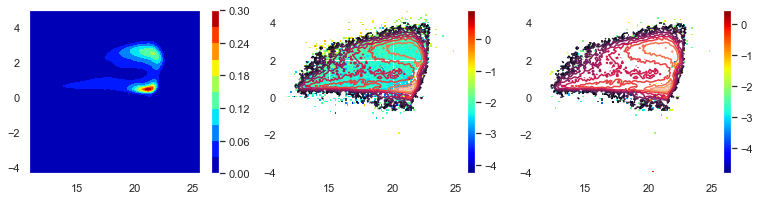

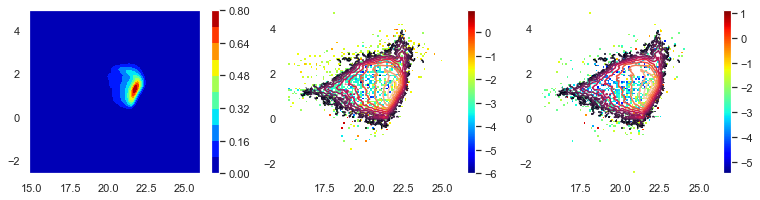

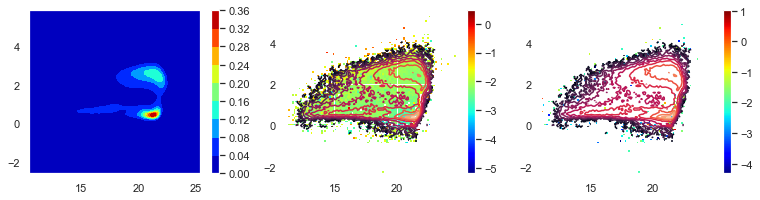

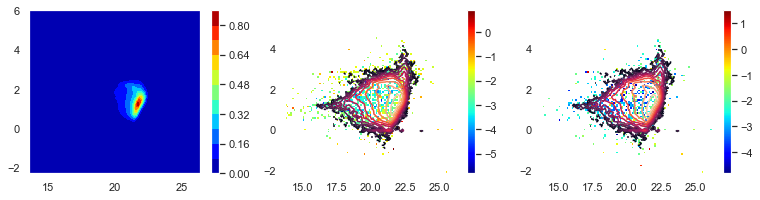

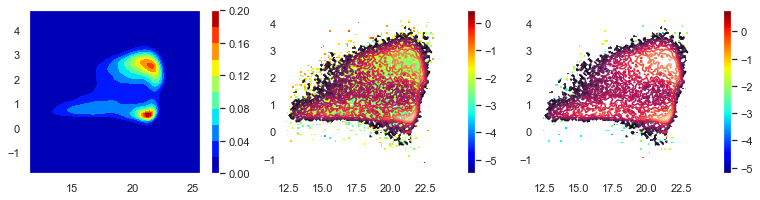

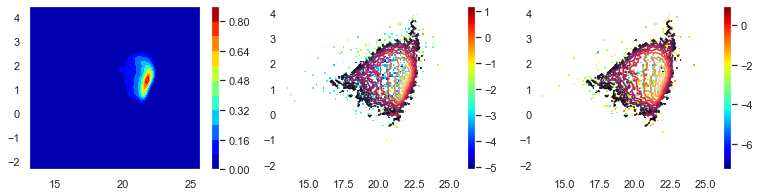

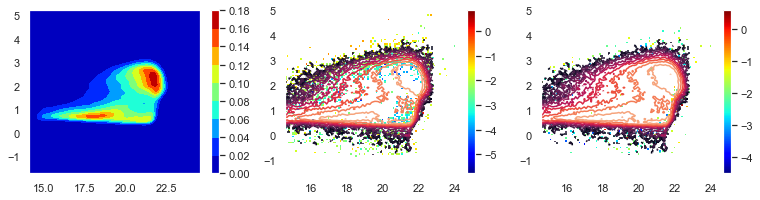

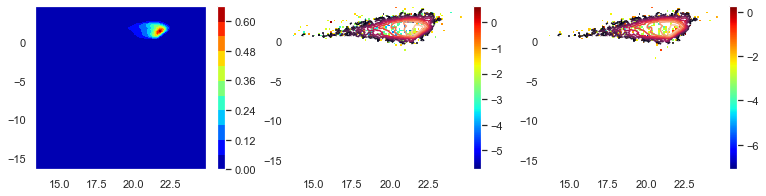

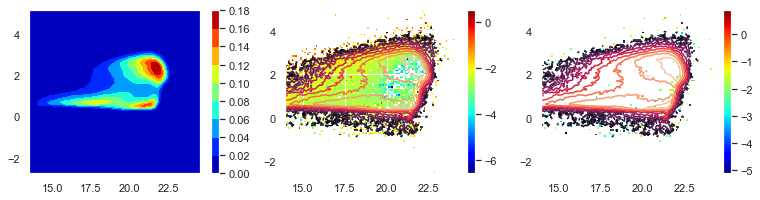

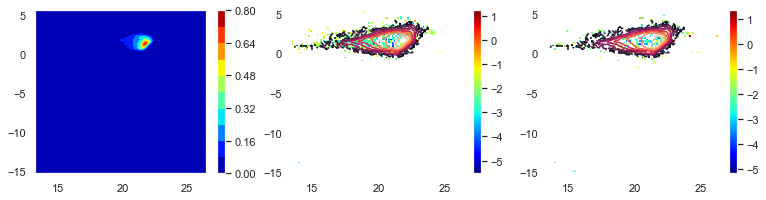

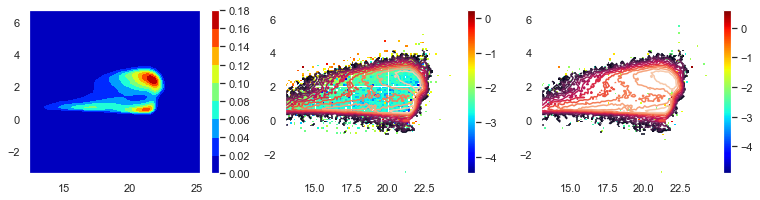

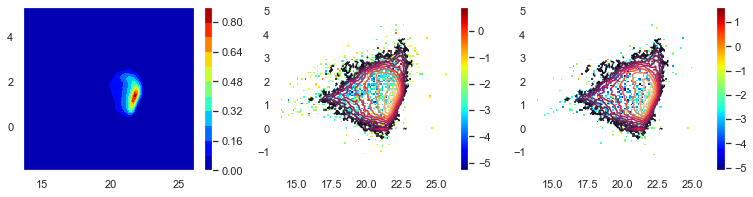

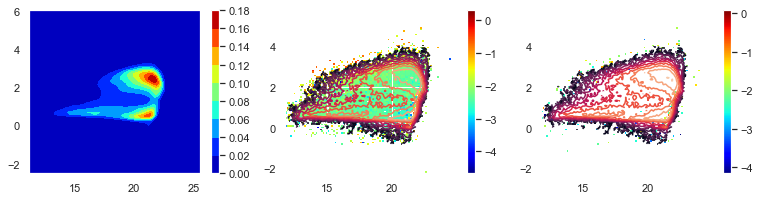

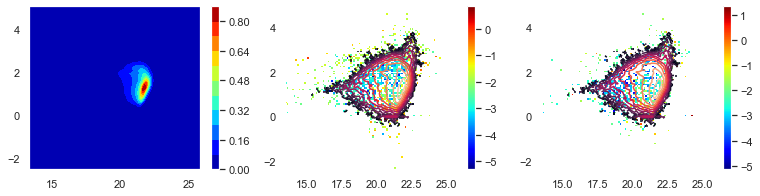

In [506]:
main_plot()

I think I can plot the first kdeplot with matplotlib to make the three plots look similar but run out of time to do it. I will finish it later on. And I will find some time later to learn how to add more stuffs like "subtitle". 

# Problem 2

### Comparing distributions to a standard normal distribution

Load the `IntroStat_demo.csv` file in the data directory (use `pandas` or `astropy` or whatever you like).

Estimate the sample mean and variance of the suspiciously named `mag.outlier` column.

Make a Q-Q plot of the `mag.outlier` column and over plot a line with `Y = Mean + Sigma*X` on it. 

Calculate the values of the first and third quartiles, and use some linear algebra to figure out the equation of a line passing through them (google line 2 point form if you need a refresher on the linear algebra)

Overplot that line passing through the data.

Now try the same thing with `mag.het`. Describe what you found?

What happens if you rescale the data? Subtract of the sample mean of `mag.het` and divide by `mag.het.error`. Now repeat the Q-Q plot with this quantity. 

Describe what's going on.

Load the file

In [507]:
%pylab
%matplotlib inline
from scipy import stats
import pandas as pd
import seaborn as sns
df = pd.read_csv("/Users/zhengkai/Desktop/Astro596/ast596_2020_Spring/data/01/IntroStat_demo.csv")
#df
mag_outlier = df["mag.outlier"]
#mag
#type(mag)
#x = mag.to_numpy()
#type(x)

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


(1) estimate mean and variance

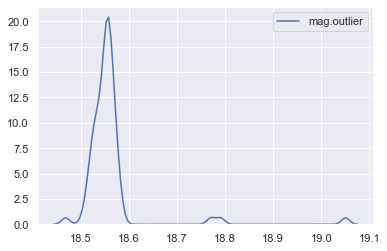

In [508]:
sns.kdeplot(mag_outlier)

mean is about 18.55 standard deiation is about ?

In [509]:
import numpy as np
mean = np.mean(mag_outlier)
sigma = np.std(mag_outlier)
print("mean is " + str(mean) +"\n" + "standard deviation is " + str(sigma))

mean is 18.561082466856572
standard deviation is 0.07128179566341636


(2)Make a Q-Q plot of the mag.outlier column and over plot a line with Y = Mean + Sigma*X on it.

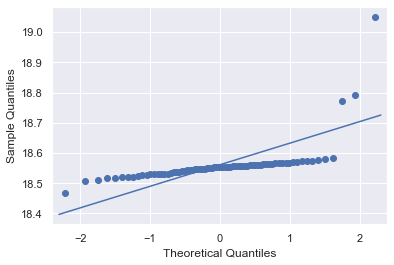

In [510]:
#first way is statmodels
import statsmodels.api as sm
sm.qqplot(mag_outlier)
#over plot a line
#read the limit of a figure
xmin, xmax, ymin, ymax = plt.axis()
#generate line
x = np.linspace(xmin, xmax, num=100)
plt.plot(x, mean + sigma*x)

(3)Calculate the values of the first and third quartiles, and use some linear algebra to figure out the equation of a line passing through them (google line 2 point form if you need a refresher on the linear algebra)
Overplot that line passing through the data.

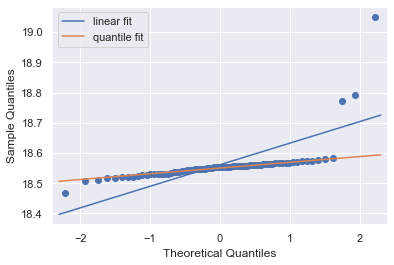

In [511]:
sm.qqplot(mag_outlier)
#over plot a line
#read the limit of a figure
xmin, xmax, ymin, ymax = plt.axis()
#generate line
x = np.linspace(xmin, xmax, num=100)
plt.plot(x, mean + sigma*x,label="linear fit")
first_quantile = mag_outlier.quantile(0.25)
third_quantile = mag_outlier.quantile(0.75)
import scipy.stats as stats
first_quantilen = stats.norm.ppf(0.25)
third_quantilen = stats.norm.ppf(0.75)
k=(third_quantile-first_quantile)/(third_quantilen-first_quantilen)
plt.plot(x, (k*(x-first_quantilen)+first_quantile), label='quantile fit')
plt.legend(loc='best')

（4）Now try the same thing with mag.het. Describe what you found?

mean is 18.54834115592681
standard deviation is 0.045296487082746514


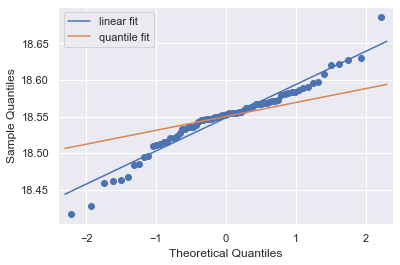

In [512]:
mag_het = df["mag.het"]
mean = np.mean(mag_het)
sigma = np.std(mag_het)
print("mean is " + str(mean) +"\n" + "standard deviation is " + str(sigma))
sm.qqplot(mag_het)
#over plot a line
#read the limit of a figure
xmin, xmax, ymin, ymax = plt.axis()
#generate line
x = np.linspace(xmin, xmax, num=100)
plt.plot(x, mean + sigma*x,label="linear fit")
first_quantile = mag_outlier.quantile(0.25)
third_quantile = mag_outlier.quantile(0.75)
import scipy.stats as stats
first_quantilen = stats.norm.ppf(0.25)
third_quantilen = stats.norm.ppf(0.75)
k=(third_quantile-first_quantile)/(third_quantilen-first_quantilen)
plt.plot(x, (k*(x-first_quantilen)+first_quantile), label='quantile fit')
plt.legend(loc='best')

I find the linear fit now is better than quantile fit while in the earlier case vice versa.

(5)What happens if you rescale the data? Subtract of the sample mean of mag.het and divide by mag.het.error. Now repeat the Q-Q plot with this quantity.

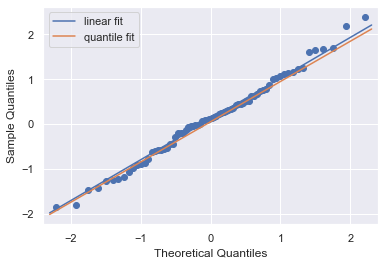

In [513]:
mean = np.mean(mag_het)
sigma = np.std(mag_het)
mag_rescale = (mag_het-mean)/df["mag.het.error"]
#print("mean is " + str(mean) +"\n" + "standard deviation is " + str(sigma))
sm.qqplot(mag_rescale)
#over plot a line
#read the limit of a figure
xmin, xmax, ymin, ymax = plt.axis()
#generate line
x = np.linspace(xmin, xmax, num=100)
mean = np.mean(mag_rescale)
sigma = np.std(mag_rescale)
plt.plot(x, mean + sigma*x,label="linear fit")
first_quantile = mag_rescale.quantile(0.25)
third_quantile = mag_rescale.quantile(0.75)
import scipy.stats as stats
first_quantilen = stats.norm.ppf(0.25)
third_quantilen = stats.norm.ppf(0.75)
k=(third_quantile-first_quantile)/(third_quantilen-first_quantilen)
plt.plot(x, (k*(x-first_quantilen)+first_quantile), label='quantile fit')
plt.legend(loc='best')

not sure about the meaning of mag.het.error. I guess after rescale the difference is some normal distribution. Although the data itself may not be normal distribution, but the difference should follow normal distribution. And after being divided by error it becomes a normal distribution N(0,1). Now the normal distribution fits pretty well.

# Problem 3

The demo data set for this part is the Wesenheit index of the OGLE-III fundamental-mode and first overtone classical Cepheids. 

These stars are awesome because you can use them to measure distances. Here's a nice [youtube video](https://www.youtube.com/watch?v=iyisAjHdhas) on these stars.

You'll try to estimate their period-luminosity relationship. 

The Wesenheit index is defined as `W = I - 1.55(V - I)`, and its main advantage over using simply the I or V photometry is that it is insensitive to extinction. It is denoted by 'W' among the data columns. 

Other columns are 'name', the identifier of the star; 'RA0' (in decimal hours) and 'Decl0' (in decimal degrees), celestial coordinates; 'Mode', the mode of the Cepheid ('F' indicates fundamental-mode, '1' indicates first overtone star); 'Cloud', indicating which Magellanic Cloud the star belongs to; 'logP1', the base-10 logarithm of the period in days; 'VI', the colour V-I.


Split the data into LMC and SMC, and then again by mode F and 1, and plot the `W` on the y-axis vs `log(P1)` on x.
Fit or estimate straight lines to each of the four samples (you can use `statsmodels` `astropy` `scipy` `numpy`....)
(Yes, we've not covered fitting straight lines. That's OK.)

Compute the residuals of each sample to it's respective line. Do these residuals look like a normal distribution? If not, speculate on why (WATCH THE YOUTUBE VIDEO!)

Plot the residuals color coded by if they are positive or negative vs RA and Dec (just like a Hess diagram in Problem 1).

Finally, plot the residuals against the fitted `W` values, and just to anticipate the next homework assignment, also plot `log(P1) vs V-I`. Comment on what you are seeing.

long period Cepheids variables have larger luminosity(actually approximately proportional)
Then use luminosity to determin the distance: 
L denotes the total luminosity of Cepheids 
F the luminosity we measure
F = L / 4\pi r^2

(1) Split the data into LMC and SMC, and then again by mode F and 1, and plot the W on the y-axis vs log(P1) on x. Fit or estimate straight lines to each of the four samples (you can use statsmodels astropy scipy numpy....) (Yes, we've not covered fitting straight lines. That's OK.)

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


/Users/zhengkai/miniconda3/envs/fds/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['mean']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


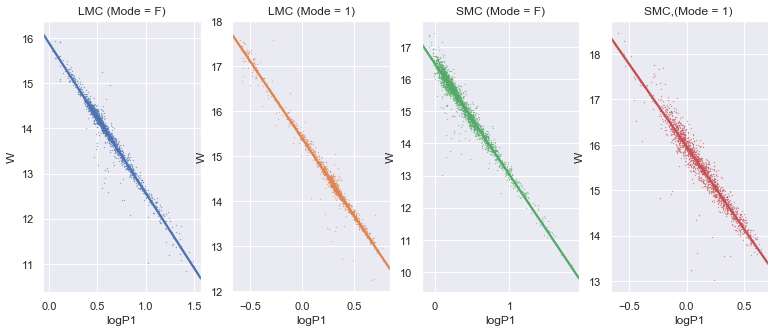

In [514]:
%pylab
%matplotlib inline
from scipy import stats
import pandas as pd
import seaborn as sns
df = pd.read_csv("/Users/zhengkai/Desktop/Astro596/ast596_2020_Spring/data/01/Cepheids.csv")
#print(df)
#type(df["Mode"][0])
df_Cloud = df["Cloud"]
df_Mode = df["Mode"]
LMC_F = df[(df_Cloud == "LMC") & (df_Mode == "F")]
LMC_1 = df[(df_Cloud == "LMC") & (df_Mode == "1")]
SMC_F = df[(df_Cloud == "SMC") & (df_Mode == "F")]
SMC_1 = df[(df_Cloud == "SMC") & (df_Mode == "1")]


fig, (ax_LF, ax_L1, ax_SF, ax_S1) = plt.subplots(ncols=4,figsize=(13,5))

p1 = sns.regplot(x=LMC_F['logP1'], y=LMC_F['W'], ax=ax_LF,scatter_kws={'s':0.1})
p2 = sns.regplot(x=LMC_1['logP1'], y=LMC_1['W'], ax=ax_L1,scatter_kws={'s':0.1})
p3 = sns.regplot(x=SMC_F['logP1'], y=SMC_F['W'], ax=ax_SF,scatter_kws={'s':0.1})
p4 = sns.regplot(x=SMC_1['logP1'], y=SMC_1['W'], ax=ax_S1,scatter_kws={'s':0.1})

ax_LF.set_title("LMC (Mode = F)");
ax_L1.set_title("LMC (Mode = 1)");
ax_SF.set_title("SMC (Mode = F)");
ax_S1.set_title("SMC,(Mode = 1) ");

Sadly, seaborn does not allow us to read the equation.

In [528]:
from sklearn.linear_model import LinearRegression
import numpy as np

def plot2(data,name):
    x=np.array(data['logP1']).reshape(-1,1)
    y=np.array(data['W']).reshape(-1,1)
    result = model.fit(x,y)
    k = result.coef_
    b = result.intercept_
    linear = k*x+b
    residue = y-linear
    
    
    fig,axes=plt.subplots(2,2,figsize=(16,8))
    sns.distplot(residue,ax=axes[0,0])
    axes[0,0].set_title(name+"distribution")
    #to test whether it is a normal distribution use qq plot
    sm.qqplot(residue.ravel(),ax=axes[0,1],line='r',marker="+")
    axes[0,1].set_title(name+"qqplot")

    sign_r = []
    for i in range(len(data['logP1'])):
        if residue[i] > 0:
            sign_r.append('positive')
        else:
            sign_r.append('negative')
    data['sign_r']= sign_r        
    sns.scatterplot(x=data['RA0'], y=data['Decl0'],hue=data['sign_r'], ax=axes[1,0])

    d=pd.DataFrame({'linear':linear.ravel(),'residue':residue.ravel()})
    sns.scatterplot(x='linear',y='residue',data=d ,ax=axes[1,1])

    fig,(ax,ax2) = plt.subplots(1,2,figsize=(16,8))
    sns.scatterplot(x=LMC_F['VI'], y=LMC_F['logP1'],ax=ax)

def main_plot():
    plot2(LMC_F,"LMC(Mode=F)")
    plot2(LMC_1,"LMC(Mode=1)")
    plot2(SMC_F,"SMC(Mode=F)")
    plot2(SMC_1,"SMC(Mode=1)")
    

/Users/zhengkai/miniconda3/envs/fds/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/zhengkai/miniconda3/envs/fds/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/zhengkai/miniconda3/envs/fds/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

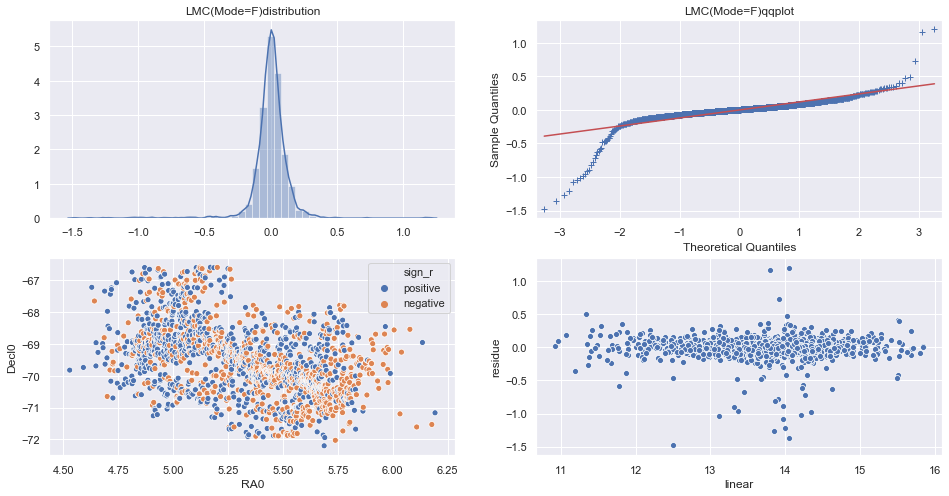

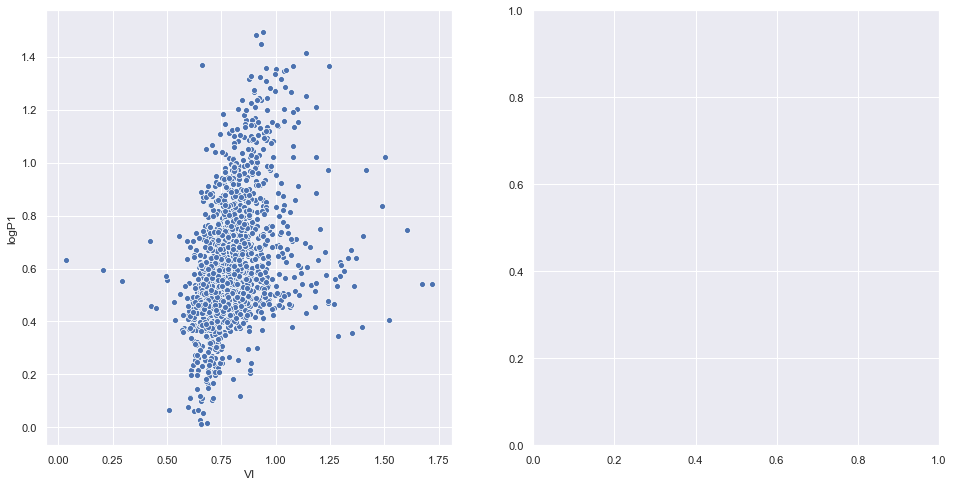

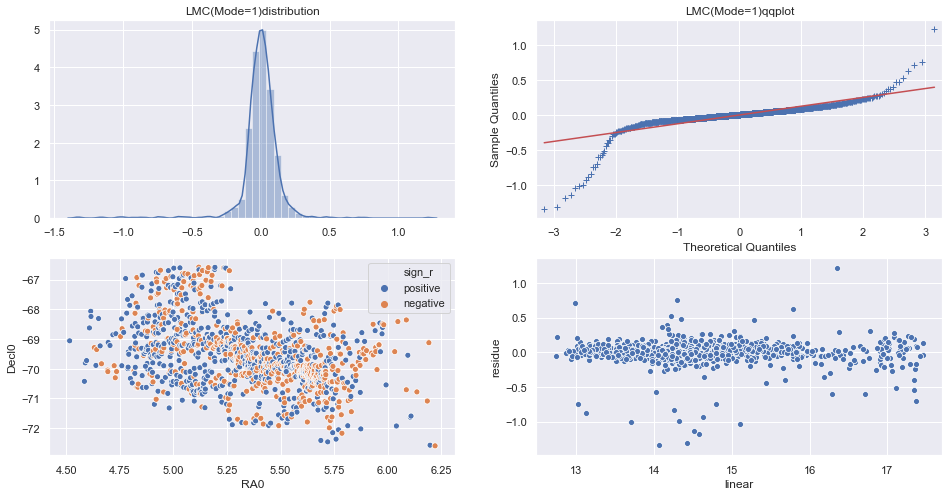

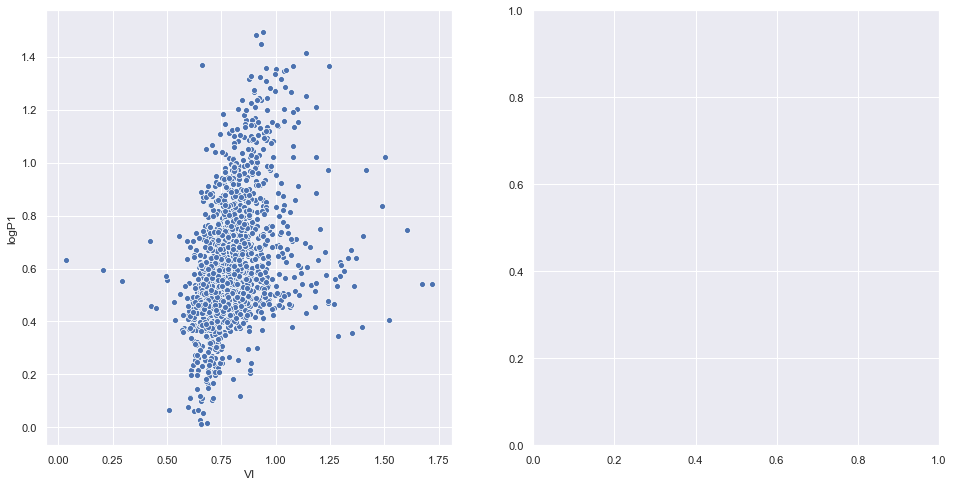

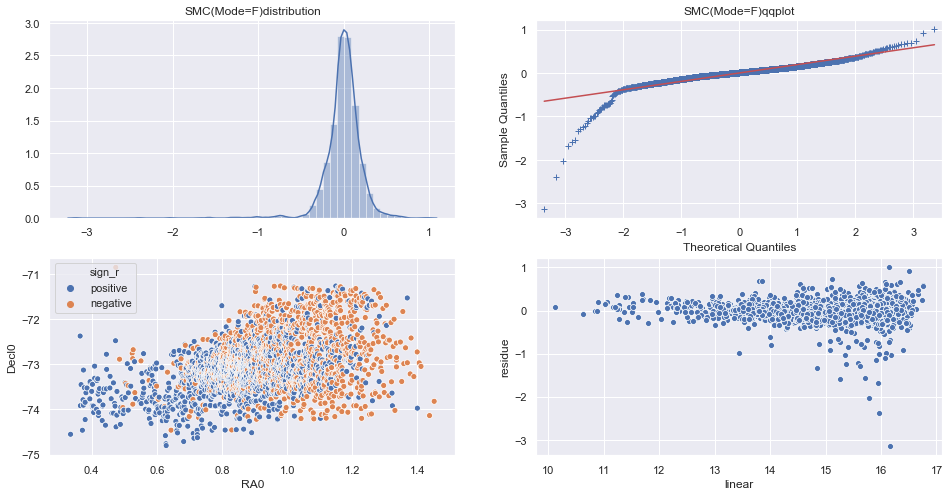

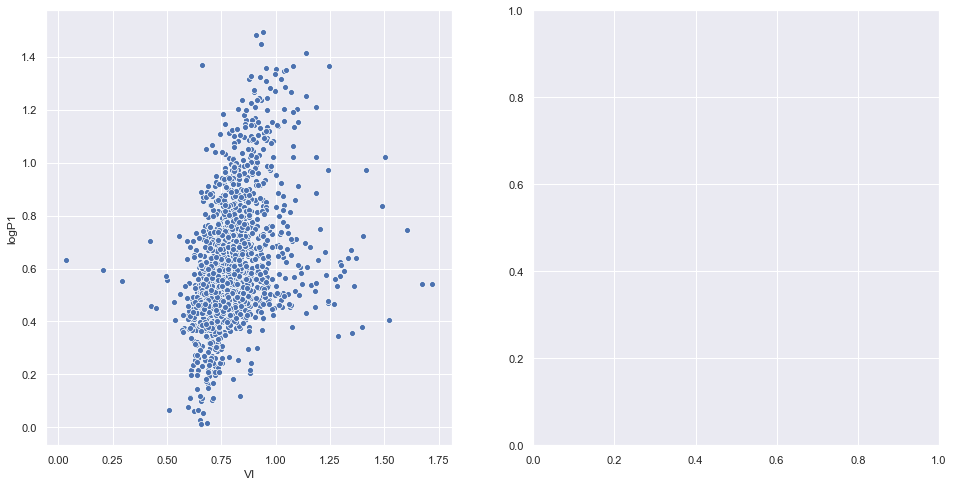

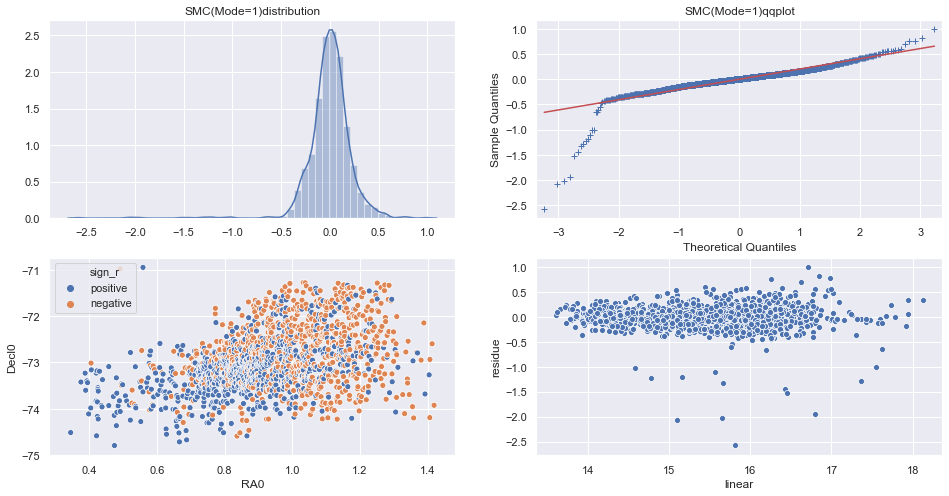

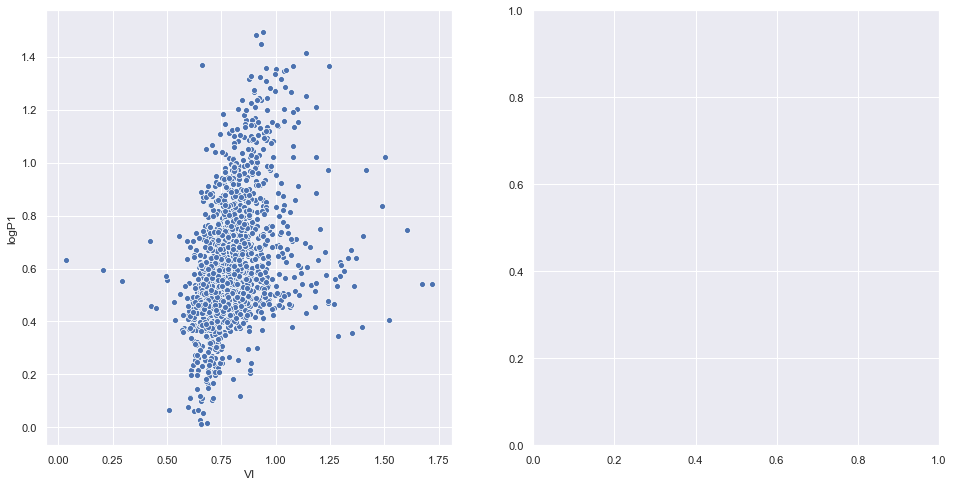

In [529]:
main_plot()

In [ ]:
# from sklearn.linear_model import LinearRegression
# import numpy as np
# model = LinearRegression()
# #Linera regression needs n \times 1 matrix such as [[1],[2],[3],[4]] as input
# #this can be done by numpy.reshape(-1,1) (the first parameter -1 is equivalent to the total
# #element numbers of the matrix)
# x=np.array(LMC_F['logP1']).reshape(-1,1)
# y=np.array(LMC_F['W']).reshape(-1,1)
# result = model.fit(x,y)
# k = result.coef_
# b = result.intercept_
# linear = k*x+b
# # ax = plt.figure()
# # plt.scatter(x,y)
# # plt.plot(x,linear)
# residue = y-linear
# fig,axes=plt.subplots(2,2,figsize=(16,8))
# sns.distplot(residue,ax=axes[0,0])
# axes[0,0].set_title("LMC_F "+"distribution")
# #to test whether it is a normal distribution use qq plot
# sm.qqplot(residue,ax=axes[0,1],line='45')
# axes[0,1].set_title("LMC_F "+"qqplot")

# sign_r = []
# for i in range(len(LMC_F['logP1'])):
#     if residue[i] > 0:
#         sign_r.append('positive')
#     else:
#         sign_r.append('negative')
# LMC_F['sign_r']= sign_r        
# sns.scatterplot(x=LMC_F['RA0'], y=LMC_F['Decl0'],hue=LMC_F['sign_r'], ax=axes[1,0])

# d=pd.DataFrame({'linear':linear.ravel(),'residue':residue.ravel()})
# sns.scatterplot(x='linear',y='residue',data=d ,ax=axes[1,1])

# fig,(ax,ax2) = plt.subplots(1,2,figsize=(16,8))
# sns.scatterplot(x=LMC_F['VI'], y=LMC_F['logP1'],ax=ax)
# #data=pd.DataFrame({'a':[[1],[2],[3]],'b':[[2],[3],[4]]})
# #sns.scatterplot(x='a',y='b',data=data ,ax=axes[1,1])
# #print(data)

In [ ]:
# m = [[1],[2]]
# n = [[2],[4]]
# model = LinearRegression()
# result = model.fit(m,n)
# k = result.coef_
# b = result.intercept_
# print(k,b)

In [ ]:
# import numpy as np
# import pandas as pd
# A = [[1,-2],[-1,2],[3,-4]]
#-------------------------------------
#方法1
# #先创造stirng类型的list
# B = []
# for i in range(len(A)*len(A[0])):
#     B.append("")
# #再通过list分组来创造string类型的矩阵
# C = []
# for i in range(len(A)):
#      D = []
#      for j in range(len(A[0])):
#         D.append(B[i*len(A[0])+j])
#      C.append(D)
# #输入矩阵C 存储矩阵A的数据正还是负
# for i in range(len(A)):
#     for j in range(len(A[0])):
#         if A[i][j] > 0:
#             C[i][j]="Positive"
#         else:              
#             C[i][j]="Negative"
# C
#--------------------------------------
#方法2
# C = [["" for col in range(len(A[0]))] for row in range(len(A))]
# for i in range(len(A)):
#     for j in range(len(A[0])):
#         if A[i][j] > 0:
#             C[i][j]="Positive"
#         else:              
#             C[i][j]="Negative"
# C

In [ ]:
#import matplotlib.pyplot as plt
#import seaborn as sns; 
# sns.set()
# tips = sns.load_dataset("tips")
# tips
# sns.scatterplot(x="total_bill", y="tip", hue="time",data=tips)